In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from openbb import obb
obb.user.preferences.output_type = "dataframe"

In [2]:
chains = obb.derivatives.options.chains(
    "AAPL",
    provider="cboe",
)

In [3]:
calls = chains[chains['option_type'] == 'call']

In [4]:
calls = calls[
(calls.dte < 100)
& (calls.strike >= 100)
]
calls.drop_duplicates(subset=["strike", "dte"], keep=False,inplace=True)

In [5]:
calls

,underlying_symbol,underlying_price,contract_symbol,expiration,dte,strike,option_type,open_interest,volume,theoretical_price,...,low,prev_close,change,change_percent,implied_volatility,delta,gamma,theta,vega,rho
0,AAPL,220.1434,AAPL240906C00100000,2024-09-06,-1,100.0,call,9,7,120.8009,...,120.86,122.350002,-1.490,-0.012178,0.0000,1.0000,0.0000,0.0000,0.0000,0.0001
2,AAPL,220.1434,AAPL240906C00105000,2024-09-06,-1,105.0,call,1,2,115.8009,...,118.80,117.325001,1.475,0.012572,0.0000,1.0000,0.0000,0.0000,0.0000,0.0001
4,AAPL,220.1434,AAPL240906C00110000,2024-09-06,-1,110.0,call,3,0,110.8009,...,0.00,112.375000,0.000,0.000000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0001
6,AAPL,220.1434,AAPL240906C00115000,2024-09-06,-1,115.0,call,1,0,105.8009,...,0.00,107.325001,0.000,0.000000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0001
8,AAPL,220.1434,AAPL240906C00120000,2024-09-06,-1,120.0,call,3,0,100.8009,...,0.00,102.375000,0.000,0.000000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,AAPL,220.1434,AAPL241115C00330000,2024-11-15,69,330.0,call,810,26,0.0392,...,0.01,0.035000,-0.005,-0.142857,0.3318,0.0044,0.0004,-0.0028,0.0132,0.0017
960,AAPL,220.1434,AAPL241115C00340000,2024-11-15,69,340.0,call,5779,0,0.0325,...,0.00,0.035000,0.000,0.000000,0.3493,0.0035,0.0003,-0.0024,0.0109,0.0014
962,AAPL,220.1434,AAPL241115C00350000,2024-11-15,69,350.0,call,2272,2,0.0274,...,0.03,0.025000,0.005,0.200000,0.3709,0.0029,0.0002,-0.0021,0.0092,0.0011
964,AAPL,220.1434,AAPL241115C00360000,2024-11-15,69,360.0,call,5666,0,0.0236,...,0.00,0.025000,0.000,0.000000,0.3789,0.0025,0.0002,-0.0018,0.0079,0.0010


In [7]:
vol_surface = (
    calls
    .pivot(
        index="strike",
        columns="dte",
        values="implied_volatility"
    )
    .dropna(how="all", axis=1)
)

In [8]:
vol_surface

dte,-1,6,13,20,27,34,41,48,69
strike,,,,,,,,,
100.0,0.0,0.0000,1.4674,1.2595,1.5072,1.3791,0.9374,0.0,0.9062
105.0,0.0,2.0314,1.5439,1.1469,1.4684,1.2948,0.8418,0.0,0.5977
110.0,0.0,0.0000,1.3829,1.2971,1.3465,0.0000,0.8679,0.0,0.8088
115.0,0.0,0.0000,1.5827,1.0546,0.0000,0.0000,0.6677,0.0,0.5764
120.0,0.0,0.0000,1.2291,0.9578,0.0000,0.0000,0.6027,0.0,0.5870
...,...,...,...,...,...,...,...,...,...
335.0,NaN,NaN,0.6520,NaN,NaN,NaN,NaN,NaN,NaN
340.0,NaN,NaN,NaN,NaN,NaN,NaN,0.3855,NaN,0.3493
350.0,NaN,NaN,NaN,NaN,NaN,NaN,0.4095,NaN,0.3709


In [9]:
strike, dte = np.meshgrid(vol_surface.columns,vol_surface.index)

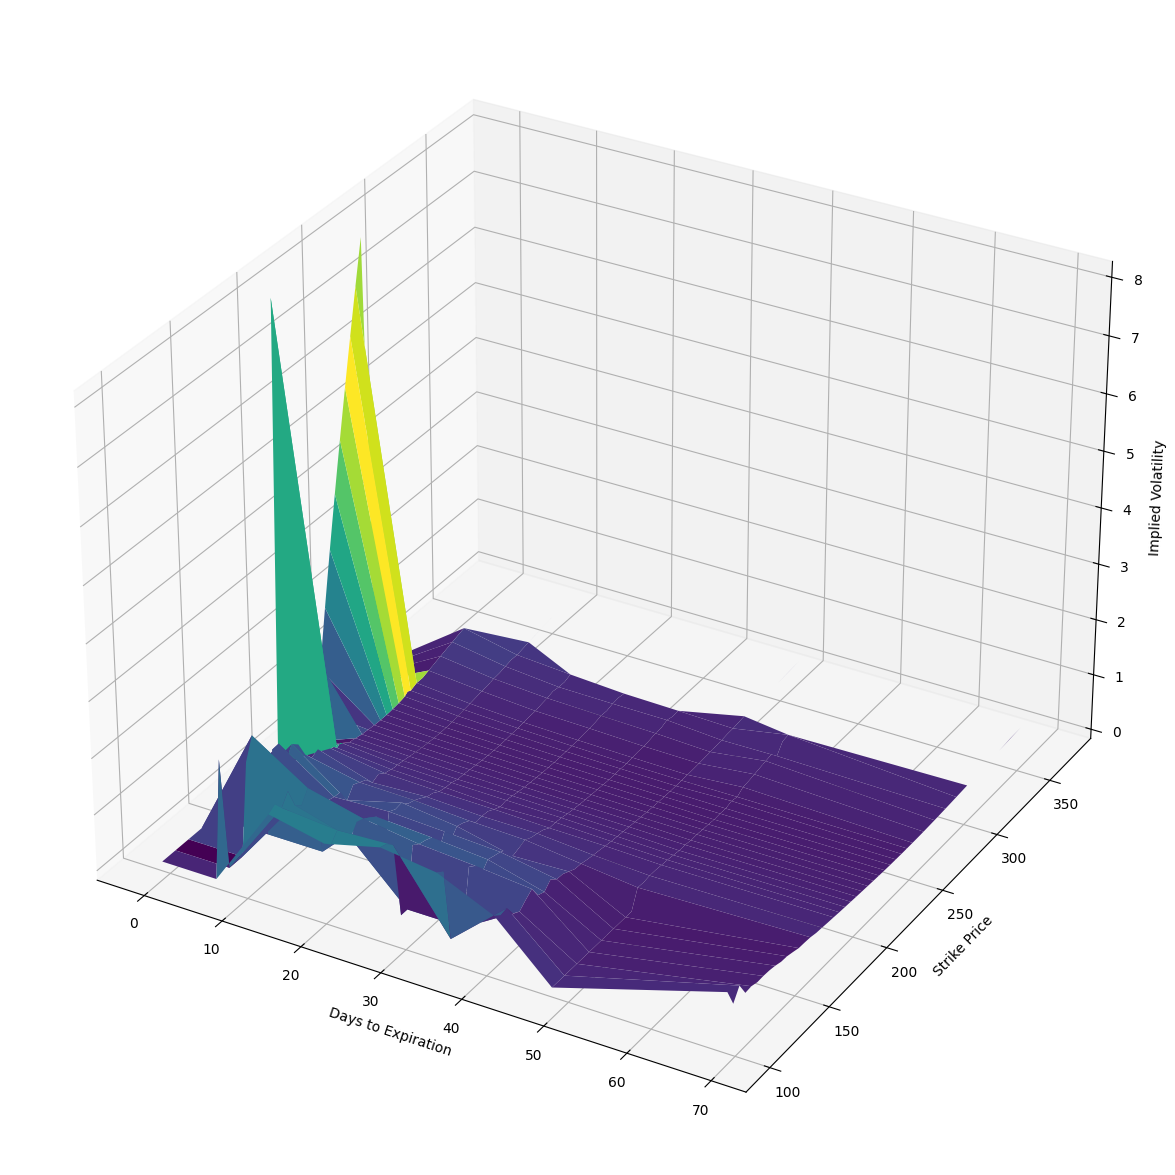

In [10]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("Days to Expiration")
ax.set_ylabel("Strike Price")
ax.set_zlabel("Implied Volatility")
ax.plot_surface(
    strike,
    dte,
    vol_surface.values,
    cmap="viridis"
)